# I. Practice

## 1) Preprocessing
- 데이터 길이, 최댓값, 최솟값 확인
- 결측치/중복치 확인 -> 처리
- Outlier확인
- Batch Normalization 고려하여 데이터 어디까지 사용할 것인기 결정(Padding처리?) 

## 2) space based tokenizing  
## 3) morpheme based tokenizing  
    - subword VS 형태소 분석
    
## 4) Decoding

# II. Project : sentencePiece
1. sentencepiece 설치
2. sentencepiece 모델 학습
3. tokenizer 함수 작성
4. 네이버 감정분석문제에 모델 적용

In [1]:
from konlpy.tag import Mecab

mecab = Mecab()
print(mecab.morphs('지금너무졸려서그냥침대로가서누워서잠들고파요'))

['지금', '너무', '졸려서', '그냥', '침대', '로', '가', '서', '누워서', '잠들', '고파요']


In [2]:
import os

import matplotlib.pyplot as plt
import tensorflow as tf
import numpy as np

%matplotlib inline

## 1) Preprocessing
- 데이터 길이, 최댓값, 최솟값 확인
- 결측치/중복치 확인 -> 처리
- Outlier확인
- Batch Normalization 고려하여 데이터 어디까지 사용할 것인기 결정(Padding처리?)


In [3]:
import os
path_to_file = os.getenv('HOME') + '/aiffel/sp_tokenizer/data/korean-english-park.train.ko'
with open (path_to_file, "r") as f:
    raw = f.read().splitlines()

print("Data Size:", len(raw))
print("Example:")
for sentence in raw[0:100][::20]: print(">>",sentence)

Data Size: 94123
Example:
>> 개인용 컴퓨터 사용의 상당 부분은 "이것보다 뛰어날 수 있느냐?"
>> 북한의 핵무기 계획을 포기하도록 하려는 압력이 거세지고 있는 가운데, 일본과 북한의 외교관들이 외교 관계를 정상화하려는 회담을 재개했다.
>> "경호 로보트가 침입자나 화재를 탐지하기 위해서 개인적으로, 그리고 전문적으로 사용되고 있습니다."
>> 수자원부 당국은 논란이 되고 있고, 막대한 비용이 드는 이 사업에 대해 내년에 건설을 시작할 계획이다.
>> 또한 근력 운동은 활발하게 걷는 것이나 최소한 20분 동안 뛰는 것과 같은 유산소 활동에서 얻는 운동 효과를 심장과 폐에 주지 않기 때문에, 연구학자들은 근력 운동이 심장에 큰 영향을 미치는지 여부에 대해 논쟁을 해왔다.


In [4]:
series = [1, 3, 5,  6, 8]
series[0:6:3]

[1, 6]

문장의 최단 길이: 1
문장의 최장 길이: 377
문장의 평균 길이: 60


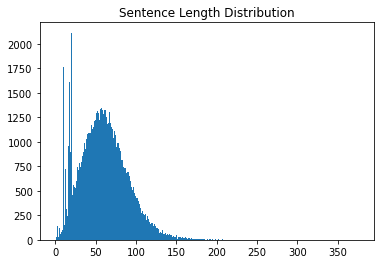

In [5]:
min_len = 999
max_len = 0
sum_len = 0

for sen in raw:
    length = len(sen)
    if min_len > length: min_len = length
    if max_len < length: max_len = length
    sum_len+= length
    
print("문장의 최단 길이:", min_len)
print("문장의 최장 길이:", max_len)
print("문장의 평균 길이:", sum_len // len(raw))

sentence_length = np.zeros((max_len), dtype=np.int)

for sen in raw:
    sentence_length[len(sen)-1] += 1

plt.bar(range(max_len), sentence_length, width=1.0)
plt.title("Sentence Length Distribution")
plt.show()
    

In [6]:
def check_sentence_with_length(raw, length):
    count = 0
    
    for sen in raw:
        if len(sen) == length:
            print(sen)
            count += 1
            if count > 100: return

check_sentence_with_length(raw, 1)

’


In [7]:
for idx, _sum in enumerate(sentence_length):
    # 문장의 수가 1500을 초과하는 문장 길이를 추출합니다.
    if _sum > 1500:
        print("Outlier Index:", idx+1)

Outlier Index: 11
Outlier Index: 19
Outlier Index: 21


In [8]:
check_sentence_with_length(raw, 11)

라고 조던이 말했다.
- 모르고 있습니다.
- 네, 보이는군요.
디즈니사만이 아니다.
큰 파티는 아니지요.
의자는 비어 있었다.
이 일은 계속됩니다.
나는 크게 실망했다.
그 이유는 간단하다.
이력서와 자기 소개서
시대가 변하고 있다.
는 돌발질문을 했다.
9. 몇 분간의 명상
하와이, 빅 아일랜드
키스를 잘 하는 방법
키스를 잘 하는 방법
스피어스가 뚱뚱한가?
산 위를 나는 느낌.
세 시간쯤 걸었을까?
(아직 읽고있습니까?
처음에는 장난이었다.
우리는 운이 좋았다.
아기가 숨을 멈출 때
건물 전체 무너져내려
그녀의 아름다운 눈.
대답은 다음과 같다.
"사과할 것이 없다.
폭탄테러가 공포 유발
그는 "잘 모르겠다.
그는 "잘 모르겠다.
그는 "잘 모르겠다.
그는 "잘 모르겠다.
그는 "잘 모르겠다.
그는 "잘 모르겠다.
그는 "잘 모르겠다.
그는 "잘 모르겠다.
그는 "잘 모르겠다.
케냐 야생동물 고아원
경유 1200원대로…
더 내려야 하는 이유
케냐 야생동물 고아원
경유 1200원대로…
더 내려야 하는 이유
케냐 야생동물 고아원
경유 1200원대로…
더 내려야 하는 이유
케냐 야생동물 고아원
경유 1200원대로…
더 내려야 하는 이유
케냐 야생동물 고아원
경유 1200원대로…
더 내려야 하는 이유
케냐 야생동물 고아원
경유 1200원대로…
더 내려야 하는 이유
케냐 야생동물 고아원
경유 1200원대로…
더 내려야 하는 이유
케냐 야생동물 고아원
경유 1200원대로…
더 내려야 하는 이유
케냐 야생동물 고아원
경유 1200원대로…
더 내려야 하는 이유
케냐 야생동물 고아원
경유 1200원대로…
더 내려야 하는 이유
케냐 야생동물 고아원
경유 1200원대로…
더 내려야 하는 이유
케냐 야생동물 고아원
경유 1200원대로…
더 내려야 하는 이유
케냐 야생동물 고아원
경유 1200원대로…
더 내려야 하는 이유
케냐 야생동물 고아원
경유 1200원대로…
더 내려야 하는 이유
케냐 야생동물 고아원
경유 1200원대로…
더 내려야 하는 이유
케냐 야생동물 고아원
경유 1

1)set 으로 중복을 제거해야 함
2) 노이즈인 데이터 확인


Data Size: 77591
문장의 최단 길이: 1
문장의 최장 길이: 377
문장의 평균 길이: 64


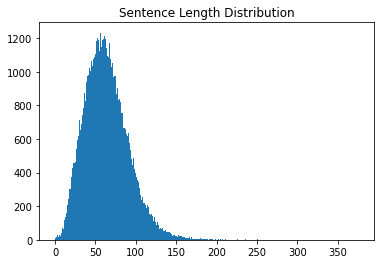

In [9]:
min_len = 999
max_len = 0
sum_len = 0

cleaned_corpus = list(set(raw))  # set를 사용해서 중복을 제거합니다.
print("Data Size:", len(cleaned_corpus))

for sen in cleaned_corpus:
    length = len(sen)
    if min_len > length: min_len = length
    if max_len < length: max_len = length
    sum_len += length

print("문장의 최단 길이:", min_len)
print("문장의 최장 길이:", max_len)
print("문장의 평균 길이:", sum_len // len(cleaned_corpus))

sentence_length = np.zeros((max_len), dtype=np.int)

for sen in cleaned_corpus:   # 중복이 제거된 코퍼스 기준
    sentence_length[len(sen)-1] += 1

plt.bar(range(max_len), sentence_length, width=1.0)
plt.title("Sentence Length Distribution")
plt.show()

- 길이 10 이상, 150 미만인 데이터로 제한

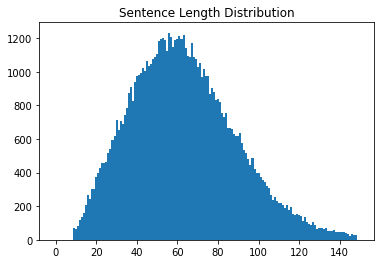

In [10]:
max_len = 150
min_len = 10

filtered_corpus = [s for s in cleaned_corpus if (len(s)< max_len) & (len(s) >= min_len)]

sentence_length = np.zeros((max_len),dtype = np.int)

for sen in filtered_corpus:
    sentence_length[len(sen)-1]+=1

plt.bar(range(max_len), sentence_length, width=1.0)
plt.title("Sentence Length Distribution")
plt.show()

In [11]:
len(filtered_corpus)

76908

## Space-based Tokenization
- data를 split 후 list에 저장
- Tokenizing
- tokenize() 함수를 사용해 단어 사전과 Tensor 데이터를 얻음
- 단어 사전의 크기 확인

In [12]:
def tokenize(corpus): #corpus 란, Tokenized sentence를 의미
    tokenizer = tf.keras.preprocessing.text.Tokenizer(filters='') #Tokenizer 생성
    tokenizer.fit_on_texts(corpus) #문장 data를 Tokenizer로 mapping
    
    # 텍스트 안의 단어를 숫자 sequence로 변환 -> tensor
    tensor=tokenizer.texts_to_sequences(corpus) 
    
    # post padding(길이 정렬) of sequence
    tensor=tf.keras.preprocessing.sequence.pad_sequences(tensor, padding='post')
    
    return tensor,tokenizer

    
    
    

fit_on_text의 시각화
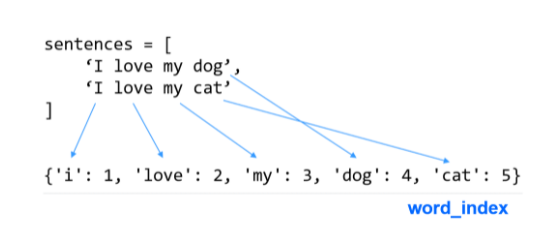



In [13]:
# split_corpus에 단어 저장

split_corpus =[]

for kor in filtered_corpus:
    split_corpus.append(kor.split())

split_corpus[0]

['또한',
 '전세계에',
 '비축된',
 '핵무기',
 '원료의',
 '안전에',
 '대한',
 '우려와',
 '핵',
 '보유국인',
 '인도와',
 '파키스탄',
 '간의',
 '위기와',
 '같은',
 '요인들이',
 '이번',
 '결정을',
 '하는데',
 '고려되었다고',
 '그는',
 '말했다.']

In [14]:
# Tokenizer 통해 fitting 및 padding 
split_tensor, split_tokenizer =tokenize(split_corpus)

print("Split Vocab Size:", len(split_tokenizer.index_word))
# sequence화 및 패딩이 된 문장 확인
split_tensor[0]

Split Vocab Size: 237435


array([   46,  4837, 83715,   564, 83716,  3876,     8, 11715,   134,
       25365,  5919,   132,   767, 13839,    33, 25366,    12,   582,
        5472, 83717,     7,     4,     0,     0,     0,     0,     0,
           0,     0,     0,     0,     0,     0,     0,     0,     0,
           0,     0,     0,     0], dtype=int32)

단어 갯수 237435로 단어장에 token으로서 word indexing 되었음

In [15]:
split_tokenizer.word_index

{'이': 1,
 '밝혔다.': 2,
 '있다.': 3,
 '말했다.': 4,
 '수': 5,
 '있는': 6,
 '그는': 7,
 '대한': 8,
 '위해': 9,
 '전했다.': 10,
 '지난': 11,
 '이번': 12,
 '한': 13,
 '대해': 14,
 '것으로': 15,
 '전': 16,
 '것이라고': 17,
 '미국': 18,
 '있다고': 19,
 '것을': 20,
 '중': 21,
 '미': 22,
 '그러나': 23,
 '다른': 24,
 '더': 25,
 '이라크': 26,
 '한편': 27,
 '많은': 28,
 '통해': 29,
 '위한': 30,
 '대통령은': 31,
 '가장': 32,
 '같은': 33,
 '그의': 34,
 '이후': 35,
 '그': 36,
 '또': 37,
 '대변인은': 38,
 '후': 39,
 '동안': 40,
 '주장했다.': 41,
 '것은': 42,
 '될': 43,
 '할': 44,
 '부시': 45,
 '또한': 46,
 '것이다.': 47,
 '보도했다.': 48,
 '덧붙였다.': 49,
 '및': 50,
 '영국': 51,
 '중국': 52,
 '두': 53,
 '자신의': 54,
 '약': 55,
 '현재': 56,
 '등': 57,
 '함께': 58,
 '모든': 59,
 '것이': 60,
 '최근': 61,
 '그리고': 62,
 '했다.': 63,
 '당시': 64,
 '경우': 65,
 '예정이다.': 66,
 '설명했다.': 67,
 '새로운': 68,
 '때문에': 69,
 '경찰은': 70,
 '있다”고': 71,
 'the': 72,
 '세계': 73,
 '정부는': 74,
 '하는': 75,
 '않았다.': 76,
 '몇': 77,
 '오바마': 78,
 '큰': 79,
 '것”이라고': 80,
 '때': 81,
 '수도': 82,
 '대통령이': 83,
 '대통령': 84,
 '않을': 85,
 '열린': 86,
 '있습니다.': 87,
 '하고': 88,
 '지난

In [16]:
split_tokenizer.index_word

{1: '이',
 2: '밝혔다.',
 3: '있다.',
 4: '말했다.',
 5: '수',
 6: '있는',
 7: '그는',
 8: '대한',
 9: '위해',
 10: '전했다.',
 11: '지난',
 12: '이번',
 13: '한',
 14: '대해',
 15: '것으로',
 16: '전',
 17: '것이라고',
 18: '미국',
 19: '있다고',
 20: '것을',
 21: '중',
 22: '미',
 23: '그러나',
 24: '다른',
 25: '더',
 26: '이라크',
 27: '한편',
 28: '많은',
 29: '통해',
 30: '위한',
 31: '대통령은',
 32: '가장',
 33: '같은',
 34: '그의',
 35: '이후',
 36: '그',
 37: '또',
 38: '대변인은',
 39: '후',
 40: '동안',
 41: '주장했다.',
 42: '것은',
 43: '될',
 44: '할',
 45: '부시',
 46: '또한',
 47: '것이다.',
 48: '보도했다.',
 49: '덧붙였다.',
 50: '및',
 51: '영국',
 52: '중국',
 53: '두',
 54: '자신의',
 55: '약',
 56: '현재',
 57: '등',
 58: '함께',
 59: '모든',
 60: '것이',
 61: '최근',
 62: '그리고',
 63: '했다.',
 64: '당시',
 65: '경우',
 66: '예정이다.',
 67: '설명했다.',
 68: '새로운',
 69: '때문에',
 70: '경찰은',
 71: '있다”고',
 72: 'the',
 73: '세계',
 74: '정부는',
 75: '하는',
 76: '않았다.',
 77: '몇',
 78: '오바마',
 79: '큰',
 80: '것”이라고',
 81: '때',
 82: '수도',
 83: '대통령이',
 84: '대통령',
 85: '않을',
 86: '열린',
 87: '있습니다.',
 88: '하고',
 89:

> 동사로 이루어진 단어를 살피면 '밝혔다' 는 밝히다, 밝다와 유사한 의미인데도 다른 단어로 분류됨.
### Morpheme Analysis using Mecab(Kolnpy)
`mecab.morphs()` is a key method

In [17]:
# morph_corpus에 단어 저장

morph_corpus =[]

for kor in filtered_corpus:
    morph_corpus.append(mecab.morphs(kor))

morph_corpus[0]


['또한',
 '전',
 '세계',
 '에',
 '비축',
 '된',
 '핵무기',
 '원료',
 '의',
 '안전',
 '에',
 '대한',
 '우려',
 '와',
 '핵',
 '보유국',
 '인',
 '인도',
 '와',
 '파키스탄',
 '간',
 '의',
 '위기',
 '와',
 '같',
 '은',
 '요인',
 '들',
 '이',
 '이번',
 '결정',
 '을',
 '하',
 '는데',
 '고려',
 '되',
 '었',
 '다고',
 '그',
 '는',
 '말',
 '했',
 '다',
 '.']

In [18]:
mecab_tensor, mecab_tokenizer = tokenize(morph_corpus)

print("MeCab Vocab Size:", len(mecab_tokenizer.index_word))

MeCab Vocab Size: 52279


> 단어장 크기가 23만개에서 5만개로 줄었습니다. 이는 의미가 중첩되는 단어들이 형태소로 나눈 결과 길이가 현저히 줄었습니다. 이것은 연산량 감소 뿐 아니라 parameter 수 줄어듦에 따른 학습량 개선으로 이어집니다.

형태소 기반 분석 모델 [KorBERT](https://aiopen.etri.re.kr/service_dataset.php)

**참고**) SentencePiece와 같은 Subword 기반 토큰화도 있음. 이는 모든 언어에 적용될 수 있는 분석기이다!

### SentencePiece VS 형태소 분석기
- sentencepiece는 특정 언어에 대한 부가적 사전지식 없이, 오직 학습을 통해 모델을 개선하므로 여러 언어에 대해 General하다. robust하고 중립적이다.
- 특정 문법과 의미정보를 바탕으로 만든 형태소 분석기는 더 정확하고 성능이 좋을 수 있으나, 강건하지 않고 변화하는 언어들에 지속적인 유지보수가 필요하다. 

### Decoding


In [19]:
mecab_tensor[100]

array([ 2925, 17960,    16,   162,  1926,   487,    73,   254,    65,
         495,    26,  9616,   487,     8,   175, 11440,  8093,    21,
         654,    41,    12,    13,     2,     1,     0,     0,     0,
           0,     0,     0,     0,     0,     0,     0,     0,     0,
           0,     0,     0,     0,     0,     0,     0,     0,     0,
           0,     0,     0,     0,     0,     0,     0,     0,     0,
           0,     0,     0,     0,     0,     0,     0,     0,     0,
           0,     0,     0,     0,     0,     0,     0,     0,     0,
           0,     0,     0,     0,     0,     0,     0,     0,     0,
           0,     0,     0,     0], dtype=int32)

1) `sequences_to_texts` 이용하는 방법

In [20]:
mecab_tokenizer.sequences_to_texts([mecab_tensor[100]])

['베를린 도심지 에서 가장 가까운 공항 3 곳 중 하나 인 템펠호프 공항 은 현재 국내선 위주 로 운영 되 고 있 다 .']

2) `tokenizer.index_word` 이용하는 방법

In [21]:
' '.join([mecab_tokenizer.index_word[num] for num in mecab_tensor[100] if num > 0])

'베를린 도심지 에서 가장 가까운 공항 3 곳 중 하나 인 템펠호프 공항 은 현재 국내선 위주 로 운영 되 고 있 다 .'

# Project : SentencePiece 사용하기
- Google에서 사용하는 오픈소스 기반 Sentence Tokenizer
- BPE 또는 unigram 두가지 토크나이징 모델 선택 가능


### 1. sentencepiece model 학습

In [22]:
import sentencepiece as spm
import os

temp_file = os.getenv('HOME')+'/aiffel/sp_tokenizer/data/korean-english-park.train.ko.temp'

# 저장할 단어의 개수 지정
vocab_size = 8000
with open(temp_file,'w') as f:
    for row in filtered_corpus: #이전 스텝에서 정제했던 corpus 활용
        f.write(str(row)+ '\n')

# input/model prefix/ vocab size 정의
spm.SentencePieceTrainer.Train(
    f'--input={temp_file} --model_prefix=korean_spm --vocab_size={vocab_size}'
)
## --model_type = 'bpe'로 옵션을 주어서 이후 결과를 확인해 보자

!ls -l korean_spm*

-rw-r--r-- 1 root root 376892 Sep 28 06:06 korean_spm.model
-rw-r--r-- 1 root root 146388 Sep 28 06:06 korean_spm.vocab


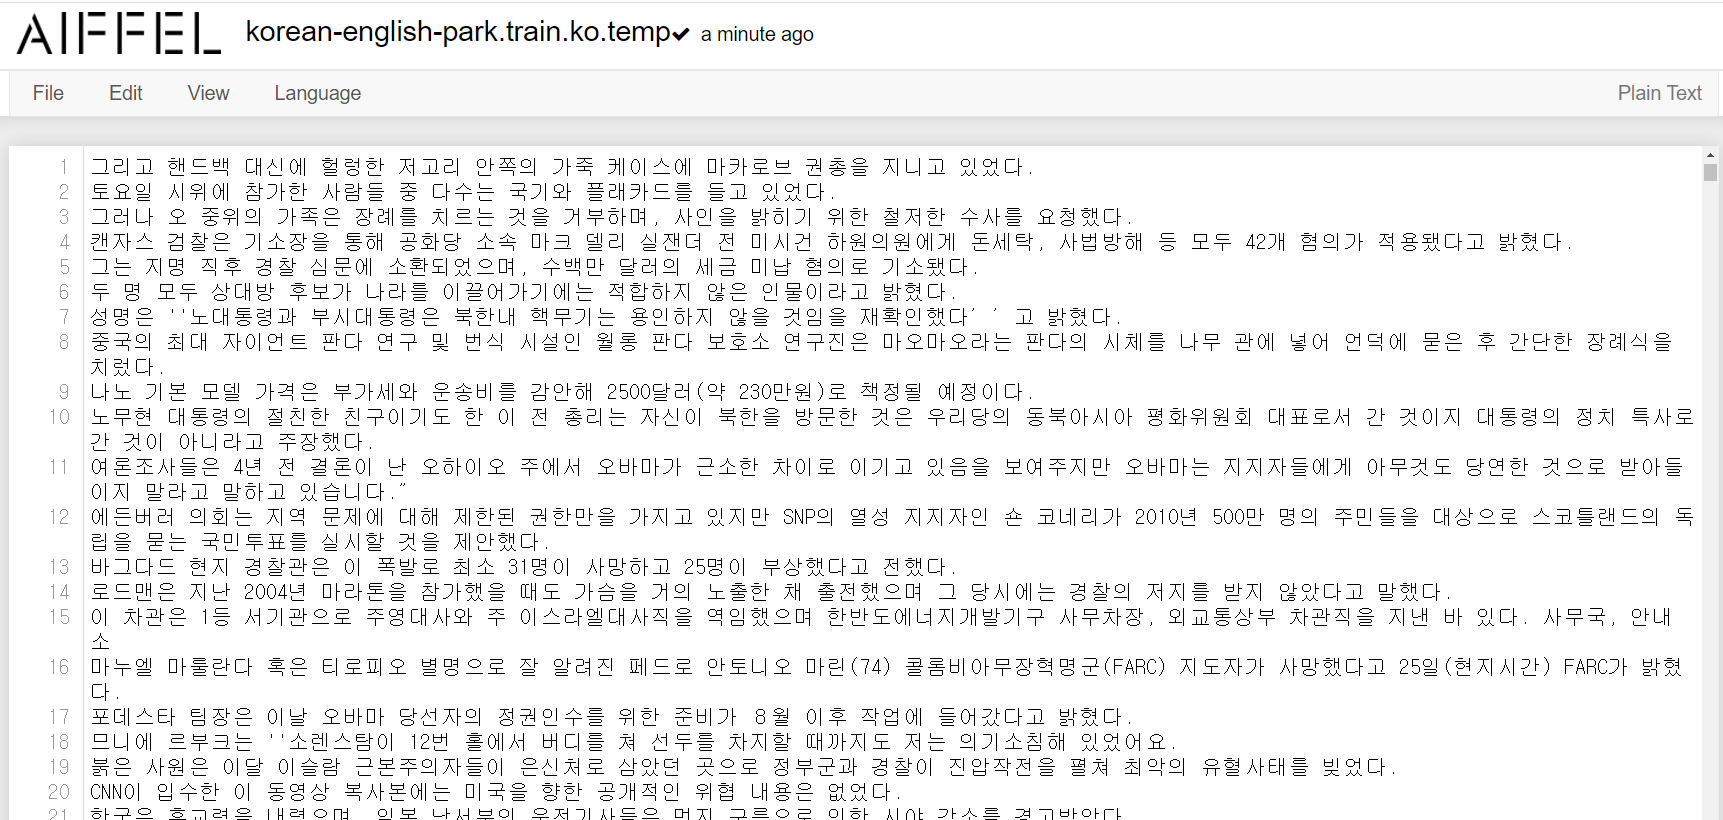

>1. 문장들이 `korean-english-park.train.ko.temp`에 입력되었다.
2. 이후 학습이 진행되고, **model과 vocab**이 파일로 저장되었다.
3. 이후 `bpe`옵션을 주어 달라진 결과를 확인해보면 좋을 것 같다.


In [23]:
s = spm.SentencePieceProcessor() #spm 모델의 Processor instance 생성
s.Load('korean_spm.model')

#encoding
tokensIDs = s.EncodeAsIds('그 해 여름은 유난히도 더웠다.')
print(tokensIDs)

#encoded pieces 로 분해하기!
print(s.SampleEncodeAsPieces('그 해 여름은 유난히도 더웠다.',1, 0.0))

#decoding
print(s.DecodeIds(tokensIDs))



[43, 278, 1852, 12, 189, 451, 101, 31, 106, 7970, 38, 3]
['▁그', '▁해', '▁여름', '은', '▁유', '난', '히', '도', '▁더', '웠', '다', '.']
그 해 여름은 유난히도 더웠다.


- BPE 옵션 추가

In [24]:
spm.SentencePieceTrainer.Train(
    f'--input={temp_file} --model_prefix=korean_spm --model_type=bpe --vocab_size={vocab_size}'
)

1. encoding : `s.EncodeAsIds()`
2. decomposition : `s.SampleEncodeAsPieces()`
3. decoding : `s.DecodeIds()`

In [25]:
s = spm.SentencePieceProcessor() #spm 모델의 Processor instance 생성
s.Load('korean_spm.model')

#encoding
tokensIDs = s.EncodeAsIds('그 해 여름은 유난히도 더웠다.')
print(tokensIDs)

#encoded pieces 로 분해하기!
print(s.SampleEncodeAsPieces('그 해 여름은 유난히도 더웠다.',1, 0.0))

#decoding
print(s.DecodeIds(tokensIDs))

[11, 82, 2154, 6693, 51, 6799, 6922, 6720, 173, 3031, 6687]
['▁그', '▁해', '▁여름', '은', '▁유', '난', '히', '도', '▁더', '웠다', '.']
그 해 여름은 유난히도 더웠다.


### Unigram과 BPE의 차이점?
BPE : subword를 점진적으로 병합  
unigram : pretrained token에서 loss 계산해서 가장 안쓰이는 토큰을 줄여나감

## 2. Tokenizer 함수 구현
- `sp_tokenize()` 함수 정의

> 1. **매개변수**로 토큰화된, **온전한 문장**의 list를 전달
2. vocab 파일로부터 word_index와 index_word 반환
3. tensor는 토큰화 후 encoding되어 padding까지 마쳐진 문장

In [26]:
def sp_tokenize(s, corpus):

    tensor = []
    
    #Raw sentence들 인코딩 후 tensor list에 저장
    for sen in corpus:
        tensor.append(s.EncodeAsIds(sen))
    
    # 한국어 사전에 있는 단어를 vocab에 저장
    with open ("./korean_spm.vocab",'r') as f:
        vocab = f.readlines()
    
    word_index = {}
    index_word = {}
    
    for idx, line in enumerate(vocab):
        word = line.split("\t")[0]

        word_index.update({idx:word})
        index_word.update({word:idx})
    
    tensor = tf.keras.preprocessing.sequence.pad_sequences(tensor, padding='post')
    
    
    return tensor, word_index, index_word
        
    
    

In [27]:
#sp_tokenize(s, corpus) 사용예제

my_corpus = ['나는 밥을 먹었습니다.', '지금너무졸려서그냥침대로가서누워서잠들고파요']
tensor, word_index, index_word = sp_tokenize(s, my_corpus)
print(tensor)
# print(word_index)
# print(index_word)

[[2037 6423 6691 1610 1869 6687    0    0    0    0    0    0    0    0
     0    0    0    0    0    0]
 [ 954 7051 6776 7435 6851 6701 6727 7442 7070  827 6694 6701 7135 7020
  6701 7245 6710 6690 6831 6821]]


## 3. Sentimental Analysis

1. SentencePiece 모델로 네이버 영화리뷰 학습
2. 학습된 모델로 `sp_tokenize()`메소드 구현
3. 구현된 Tokenizer 적용하여 감정분석모델 재학습
4. KoNLPy 형태소 분석기 사용한 모델과 성능 비교
5. model_type, vocab_size 변경 후 성능 개선 확인

> git clone으로 [해당 사이트](https://github.com/e9t/nsmc/)로부터 데이터를 다운로드 합니다.

In [28]:
!cd ~/aiffel/sp_tokenizer/
!ls
!git clone https://github.com/e9t/nsmc.git

'[D-2]Tokenizing(Mecab).ipynb'	 korean_spm.model   nsmc
 data				 korean_spm.vocab
fatal: destination path 'nsmc' already exists and is not an empty directory.


In [29]:
!ls ./nsmc

code		  ratings_train.txt  raw	synopses.json
ratings_test.txt  ratings.txt	     README.md


> 우선 unigram으로 영화리뷰 학습을 진행해 봅니다.

In [30]:
path = os.getenv('HOME')+'/aiffel/sp_tokenizer/nsmc/ratings.txt'

# input/model prefix/ vocab size 정의
spm.SentencePieceTrainer.Train(
    f'--input={path} --model_prefix=korean_spm --vocab_size={vocab_size}'
)

In [33]:
s1 = spm.SentencePieceProcessor() #spm 모델의 Processor instance 생성
s1.Load('korean_spm.model')

#encoding
tokensIDs = s1.EncodeAsIds('그 해 여름은 유난히도 더웠고, 슬픔 속에 그댈 지워야만 해요.')
print(tokensIDs)

#encoded pieces 로 분해하기!
print(s1.SampleEncodeAsPieces('그 해 여름은 유난히도 더웠고, 슬픔 속에 그댈 지워야만 해요.',1, 0.0))

#decoding
print(s1.DecodeIds(tokensIDs))

[60, 342, 5483, 21, 249, 361, 169, 14, 70, 2684, 23, 17, 3723, 4857, 60, 7606, 166, 314, 86, 35, 3, 626, 5]
['▁그', '▁해', '▁여름', '은', '▁유', '난', '히', '도', '▁더', '웠', '고', ',', '▁슬픔', '▁속에', '▁그', '댈', '▁지', '워', '야', '만', '▁', '해요', '.']
그 해 여름은 유난히도 더웠고, 슬픔 속에 그댈 지워야만 해요.


> 준수한 성능을 보입니다. 일단 그대로 갑니다.

In [52]:
def sp_tokenize(s, corpus):

    tensor = []
    
    #Raw sentence들 인코딩 후 tensor list에 저장
    for sen in corpus:
        tensor.append(s.EncodeAsIds(sen))
    
    # 한국어 사전에 있는 단어를 vocab에 저장
    with open ("./korean_spm.vocab",'r') as f:
        vocab = f.readlines()
    
    word_index = {}
    index_word = {}
    
    for idx, line in enumerate(vocab):
        word = line.split("\t")[0]

        word_index.update({idx:word})
        index_word.update({word:idx})
    
    tensor = tf.keras.preprocessing.sequence.pad_sequences(tensor, padding='post')
    
    
    return tensor, word_index, index_word

#sp_tokenize(s1, corpus) 사용예제

my_corpus = ['그 해 여름은 유난히도 더웠고, 슬픔 속에 그댈 지워야만 해요.', '지금너무졸려서그냥침대로가서누워서잠들고파요']
tensor, word_index, index_word = sp_tokenize(s1, my_corpus)
print(tensor)
# print(word_index)
# print(index_word)
   

[[  60  342 5483   21  249  361  169   14   70 2684   23   17 3723 4857
    60 7606  166  314   86   35    3  626    5]
 [ 271  310 3222 2844  844 1443  773 2692 3083 3868 4475 3430  441   61
     0    0    0    0    0    0    0    0    0]]


In [59]:
word_index

{0: '<unk>',
 1: '<s>',
 2: '</s>',
 3: '▁',
 4: '▁1',
 5: '.',
 6: '▁0',
 7: '▁9',
 8: '이',
 9: '..',
 10: '▁영화',
 11: '...',
 12: '▁8',
 13: '의',
 14: '도',
 15: '가',
 16: '는',
 17: ',',
 18: '을',
 19: '▁7',
 20: '에',
 21: '은',
 22: '다',
 23: '고',
 24: '▁6',
 25: '▁10',
 26: '▁5',
 27: '지',
 28: '?',
 29: '한',
 30: '▁3',
 31: '▁4',
 32: '를',
 33: '▁너무',
 34: '▁2',
 35: '만',
 36: '!',
 37: '▁이',
 38: '로',
 39: '▁정말',
 40: '게',
 41: '나',
 42: '영화',
 43: '▁진짜',
 44: '~',
 45: '과',
 46: '기',
 47: '어',
 48: '리',
 49: '인',
 50: '하고',
 51: '라',
 52: '아',
 53: '으로',
 54: '점',
 55: '네',
 56: '서',
 57: '▁안',
 58: '▁잘',
 59: '에서',
 60: '▁그',
 61: '요',
 62: '들',
 63: '해',
 64: '와',
 65: '▁다',
 66: '▁아',
 67: '하는',
 68: '▁왜',
 69: '....',
 70: '▁더',
 71: '▁수',
 72: '네요',
 73: '!!',
 74: '▁이런',
 75: '거',
 76: '자',
 77: '음',
 78: '스',
 79: '▁그냥',
 80: '▁본',
 81: '면',
 82: '수',
 83: '대',
 84: '▁드라마',
 85: '시',
 86: '야',
 87: '하',
 88: '사',
 89: '지만',
 90: '하게',
 91: '니',
 92: '▁한',
 93: '함',
 94: '▁보

In [63]:
output2 = [word_index[i] for i in tensor[0]]
output2

['▁그',
 '▁해',
 '▁여름',
 '은',
 '▁유',
 '난',
 '히',
 '도',
 '▁더',
 '웠',
 '고',
 ',',
 '▁슬픔',
 '▁속에',
 '▁그',
 '댈',
 '▁지',
 '워',
 '야',
 '만',
 '▁',
 '해요',
 '.']

In [61]:
print(s1.SampleEncodeAsPieces('그 해 여름은 유난히도 더웠고, 슬픔 속에 그댈 지워야만 해요.',1, 0.0))

['▁그', '▁해', '▁여름', '은', '▁유', '난', '히', '도', '▁더', '웠', '고', ',', '▁슬픔', '▁속에', '▁그', '댈', '▁지', '워', '야', '만', '▁', '해요', '.']


In [65]:
output1=s1.SampleEncodeAsPieces('그 해 여름은 유난히도 더웠고, 슬픔 속에 그댈 지워야만 해요.',1, 0.0)

#같은지 확인
print(output1==output2)

True


>sp.tokenizer()로 구현한 함수와, sentencepiece 모델이 같은 결과를 낸 다는 걸 확인할 수 있었습니다!  

마지막으로 형태소 분석기를 사용하여 성능을 비교해 봅시다.

In [66]:
mecab = Mecab()
print(mecab.morphs('그 해 여름은 유난히도 더웠고, 슬픔 속에 그댈 지워야만 해요.'))

['그', '해', '여름', '은', '유난히', '도', '더웠', '고', ',', '슬픔', '속', '에', '그댈', '지워야', '만', '해요', '.']


> 형태소 분석기와는 달리 '유난히', '지워야' 라는 단어가 하나 하나 쪼개진 걸 확인할 수 있어요. 성능 개선을 위해 bpe 옵션으로 재학습해 보겠습니다.

In [68]:
spm.SentencePieceTrainer.Train(
    f'--input={path} --model_prefix=korean_spm --model_type=bpe --vocab_size={vocab_size}'
)
s2 = spm.SentencePieceProcessor() #spm 모델의 Processor instance 생성
s2.Load('korean_spm.model')

#encoding
tokensIDs = s2.EncodeAsIds('그 해 여름은 유난히도 더웠고, 슬픔 속에 그댈 지워야만 해요.')
print(tokensIDs)

#encoded pieces 로 분해하기!
print(s2.SampleEncodeAsPieces('그 해 여름은 유난히도 더웠고, 슬픔 속에 그댈 지워야만 해요.',1, 0.0))

#decoding
print(s2.DecodeIds(tokensIDs))

[13, 202, 4928, 6396, 143, 6519, 6491, 6385, 103, 6768, 6379, 6414, 3157, 4138, 13, 7700, 42, 6616, 6455, 6394, 202, 6404, 6365]
['▁그', '▁해', '▁여름', '은', '▁유', '난', '히', '도', '▁더', '웠', '고', ',', '▁슬픔', '▁속에', '▁그', '댈', '▁지', '워', '야', '만', '▁해', '요', '.']
그 해 여름은 유난히도 더웠고, 슬픔 속에 그댈 지워야만 해요.


> 이런, '해요' 까지 분리되어 버렸네요. unigram이 bpe 모델로부터 파생된 더 나은 모델(cross entropy 계산하는 모델)이기 때문인 듯 합니다. 다시 unigram으로 학습시키는 대신 vocab size를 줄여볼게요. 너무 단어장의 크기가 커서 잘게 쪼개지는 게 아닐까 하는 생각이 들어서입니다.

In [69]:
vocab_size = 5000

spm.SentencePieceTrainer.Train(
    f'--input={path} --model_prefix=korean_spm --vocab_size={vocab_size}'
)
s3 = spm.SentencePieceProcessor() #spm 모델의 Processor instance 생성
s3.Load('korean_spm.model')

#encoding
tokensIDs = s3.EncodeAsIds('그 해 여름은 유난히도 더웠고, 슬픔 속에 그댈 지워야만 해요.')
print(tokensIDs)

#encoded pieces 로 분해하기!
print(s3.SampleEncodeAsPieces('그 해 여름은 유난히도 더웠고, 슬픔 속에 그댈 지워야만 해요.',1, 0.0))

#decoding
print(s3.DecodeIds(tokensIDs))

[63, 408, 404, 533, 23, 283, 287, 123, 13, 86, 2444, 20, 22, 3937, 3, 1568, 63, 4642, 197, 274, 96, 32, 3, 731, 5]
['▁그', '▁해', '▁여', '름', '은', '▁유', '난', '히', '도', '▁더', '웠', '고', ',', '▁슬픔', '▁', '속에', '▁그', '댈', '▁지', '워', '야', '만', '▁', '해요', '.']
그 해 여름은 유난히도 더웠고, 슬픔 속에 그댈 지워야만 해요.


> '여름'까지 쪼개져 버렸습니다. 성능이 또 떨어졌습니다. 마지막으로 단어장 크기를 늘인 후 다시 확인해보기로 해요. 

In [71]:
vocab_size = 12000

spm.SentencePieceTrainer.Train(
    f'--input={path} --model_prefix=korean_spm --vocab_size={vocab_size}'
)
s4 = spm.SentencePieceProcessor() #spm 모델의 Processor instance 생성
s4.Load('korean_spm.model')

#encoding
tokensIDs = s4.EncodeAsIds('그 해 여름은 유난히도 더웠고, 슬픔 속에 그댈 지워야만 해요.')
print(tokensIDs)

#encoded pieces 로 분해하기!
print(s4.SampleEncodeAsPieces('그 해 여름은 유난히도 더웠고, 슬픔 속에 그댈 지워야만 해요.',1, 0.0))

#decoding
print(s4.DecodeIds(tokensIDs))

[54, 396, 5141, 23, 297, 329, 240, 14, 61, 3005, 25, 16, 3384, 4361, 54, 10980, 178, 390, 92, 37, 4, 650, 5]
['▁그', '▁해', '▁여름', '은', '▁유', '난', '히', '도', '▁더', '웠', '고', ',', '▁슬픔', '▁속에', '▁그', '댈', '▁지', '워', '야', '만', '▁', '해요', '.']
그 해 여름은 유난히도 더웠고, 슬픔 속에 그댈 지워야만 해요.


# 회고
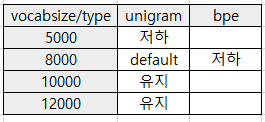
- bpe로 모델타입 변경시 성능이 저하되었고, unigram에서 더 나은 성능을 보였다. 이는 모델의 tokenizing 기법 상의 차이로 사료되며, 깊은 원리를 파악하고 있으면 더 도움이 될 듯 하다.

- vocab size를 줄였더니 성능이 저하되었고, 늘였더니 성능이 그대로 나타났다. 단어장의 크기가 작으면 더 큰 덩어리로 나누어지지 않을까 생각했는데, 오히려 더 정보가 없어서 성능이 떨어지는 것을 확인할 수 있었다.

- 한국어 형태소는 문법적인 영역이 큰 것 같다. '더워', '덥다' 라는 단어를 파헤쳐 보면, 더 + ㅂ 과 같이 분해하여 인식하는 것이 의미론적으로는 맞지만, 본 알고리즘에서는 글자 단위로 인식할 수 밖에 없기에 '더'와 '덥' 이 다른 단어로 tokenizing될 것이다. 이것이 Konlpy 형태소분석기의 성능을 따라갈 수 없는 이유가 아닌가 생각한다. 결론적으로, 자음 모음 모두 분해하여 형태소를 분석하는 알고리즘이 필요한데, 그게 논문으로 있는지는 모르겠고, 그럼 시간이 더 오래 걸릴 것 같다.
